# Assignment-3 RNN (LSTM-Time Series)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

In [2]:
df = pd.read_csv('../data&resources/Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [5]:
df.columns = ['Production']

In [6]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


<AxesSubplot:xlabel='DATE'>

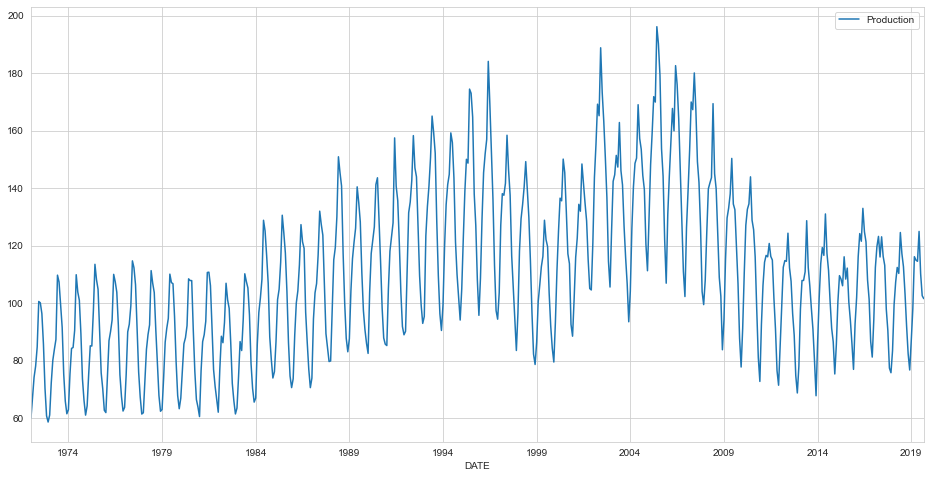

In [7]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [8]:
test_size = 18

In [9]:
test_ind = len(df)- test_size

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

### Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
# help(TimeseriesGenerator)

In [16]:
length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [17]:
X, y = generator[0]

In [18]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


In [19]:
train_scaled

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

## Modelling

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
n_features = 1

### with "tanh" activation function

In [22]:
model1 = Sequential()
model1.add(LSTM(150, activation = 'tanh', input_shape = (length, n_features)))
model1.add(Dense(1))
model1.compile(optimizer = 'adam', loss = 'mse')

In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [24]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

In [25]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [26]:
model1.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
543/543 [==============================] - 11s 15ms/step - loss: 0.0206 - val_loss: 0.0020
Epoch 2/20
543/543 [==============================] - 7s 13ms/step - loss: 0.0049 - val_loss: 0.0022
Epoch 3/20
543/543 [==============================] - 7s 13ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 4/20
543/543 [==============================] - 7s 13ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 5/20
543/543 [==============================] - 7s 13ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 6/20
543/543 [==============================] - 7s 13ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 7/20
543/543 [==============================] - 7s 12ms/step - loss: 0.0032 - val_loss: 0.0028


<AxesSubplot:>

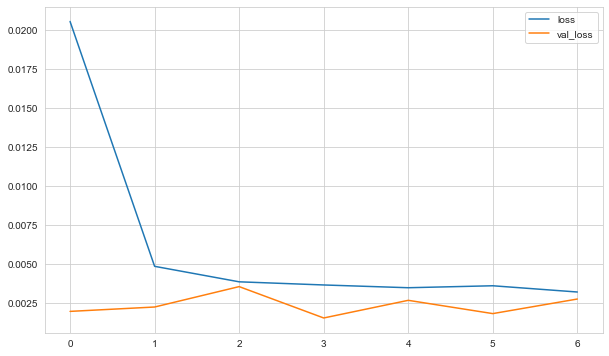

In [27]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [28]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model1.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

#### Inverse Transformations and Comparing

In [29]:
true_predictions = scaler.inverse_transform(test_predictions)

In [30]:
test['Predictions'] = true_predictions

In [31]:
test

,Production,Predictions
DATE,,
2018-04-01,112.431,114.475
2018-05-01,110.354,119.349
2018-06-01,124.584,121.040
2018-07-01,117.222,117.083
2018-08-01,112.678,107.068
2018-09-01,103.312,91.206
2018-10-01,92.132,74.771
2018-11-01,82.435,63.635
2018-12-01,76.761,63.338


<AxesSubplot:xlabel='DATE'>

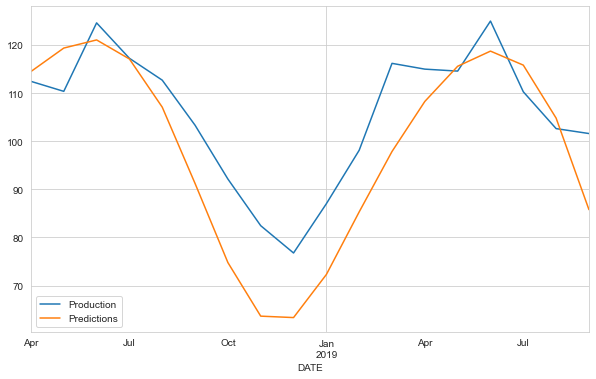

In [32]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [35]:
eval_metrics(test['Production'], test['Predictions'])

r2_score: 0.3286922317867863 
mae: 9.18638876845121 
mse: 122.0754674745598 
rmse: 11.048776741094906


### with "relu" activation function

In [36]:
model2 = Sequential()
model2.add(LSTM(150, activation = 'relu', input_shape = (length, n_features)))
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse')

In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
543/543 [==============================] - 9s 13ms/step - loss: 0.0246 - val_loss: 0.0030
Epoch 2/20
543/543 [==============================] - 7s 12ms/step - loss: 0.0072 - val_loss: 0.0019
Epoch 3/20
543/543 [==============================] - 6s 12ms/step - loss: 0.0058 - val_loss: 0.0037
Epoch 4/20
543/543 [==============================] - 7s 12ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 5/20
543/543 [==============================] - 7s 12ms/step - loss: 0.0047 - val_loss: 0.0061


<AxesSubplot:>

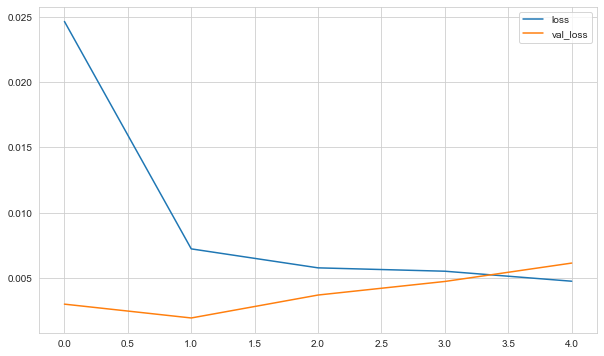

In [39]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [40]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model2.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

#### Inverse Transformations and Comparing

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)

In [42]:
test['Predictions'] = true_predictions

In [43]:
test

,Production,Predictions
DATE,,
2018-04-01,112.431,120.798
2018-05-01,110.354,126.134
2018-06-01,124.584,129.658
2018-07-01,117.222,128.803
2018-08-01,112.678,123.296
2018-09-01,103.312,110.202
2018-10-01,92.132,96.786
2018-11-01,82.435,86.521
2018-12-01,76.761,84.471


<AxesSubplot:xlabel='DATE'>

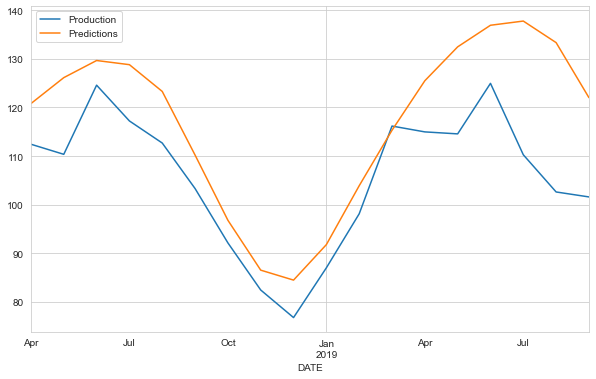

In [44]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [45]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [46]:
eval_metrics(test['Production'], test['Predictions'])

r2_score: -0.06526465803341797 
mae: 11.401810735604242 
mse: 193.71544211336132 
rmse: 13.918169495783607


## Retrain and Forecasting

In [47]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [48]:
length = 18 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [49]:
model = Sequential()
model.add(LSTM(150, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=8)

Epoch 1/8
555/555 [==============================] - 11s 16ms/step - loss: 0.0272
Epoch 2/8
555/555 [==============================] - 9s 17ms/step - loss: 0.0095
Epoch 3/8
555/555 [==============================] - 10s 17ms/step - loss: 0.0050
Epoch 4/8
555/555 [==============================] - 10s 17ms/step - loss: 0.0043
Epoch 5/8
555/555 [==============================] - 10s 17ms/step - loss: 0.0035 0s - 
Epoch 6/8
555/555 [==============================] - 9s 16ms/step - loss: 0.0031
Epoch 7/8
555/555 [==============================] - 8s 14ms/step - loss: 0.0033
Epoch 8/8
555/555 [==============================] - 7s 12ms/step - loss: 0.0031


In [50]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [51]:
forecast = scaler.inverse_transform(forecast)

In [52]:
forecast

array([[ 85.51986878],
       [ 75.77484103],
       [ 75.56087021],
       [ 85.11638949],
       [ 94.64509403],
       [102.58036027],
       [108.75050092],
       [112.75815944],
       [113.394652  ],
       [108.84053092],
       [ 98.81609994],
       [ 87.15210915],
       [ 76.18774626],
       [ 67.69583846],
       [ 71.05106947],
       [ 80.18303426],
       [ 89.84598464],
       [ 98.41020269],
       [104.88027666],
       [109.09076496],
       [109.91737048],
       [104.83367155],
       [ 95.60481017],
       [ 84.29226955]])

In [53]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [54]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [55]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [56]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [57]:
forecast_df

,Forecast
2019-10-01,85.520
2019-11-01,75.775
2019-12-01,75.561
2020-01-01,85.116
2020-02-01,94.645
2020-03-01,102.580
2020-04-01,108.751
2020-05-01,112.758
2020-06-01,113.395
2020-07-01,108.841


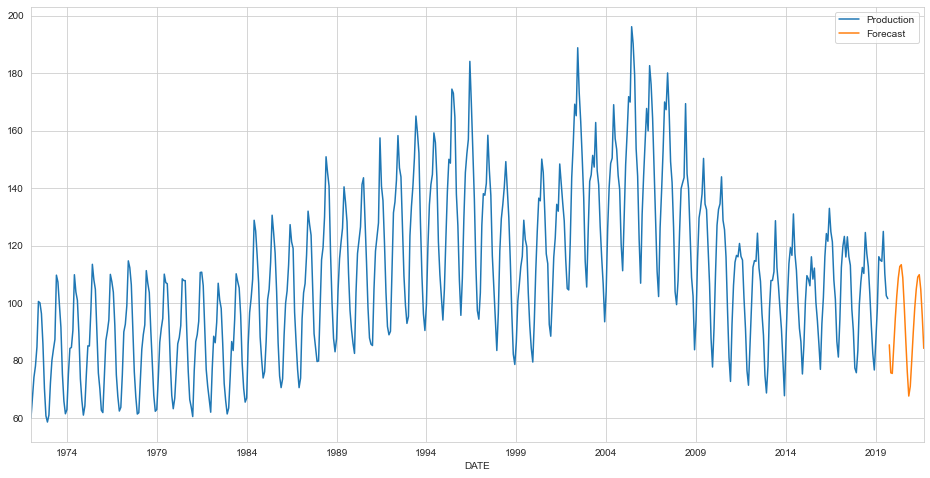

In [58]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

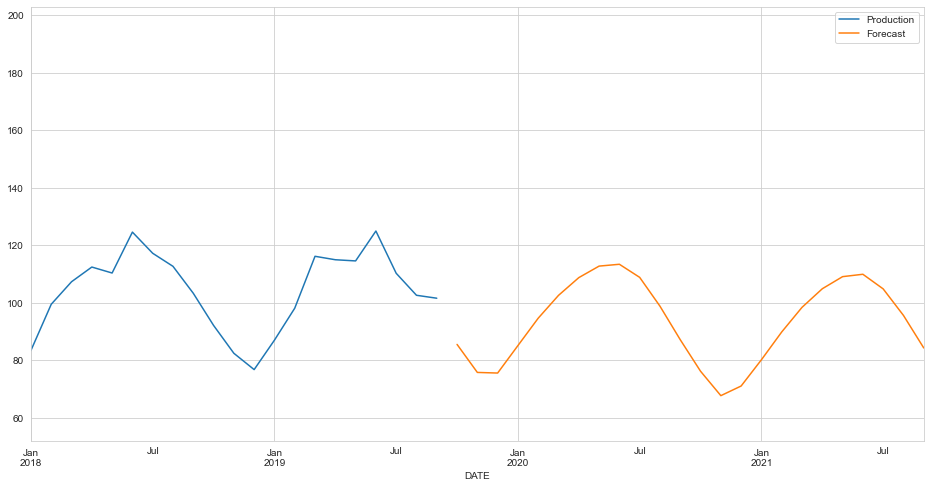

In [60]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')